***Problem Statement***: One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

***ML Problem***: With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

***Target Variable***: `persistency_flag`  

***Task***:

- Problem understanding   
- Data Understanding  
- Data Cleaning and Feature engineering  
- Model Development  
- Model Selection  
- Model Evaluation  
- Report the accuracy, precision and recall of both the class of target variable  
- Report ROC-AUC as well  
- Deploy the model  
- Explain the challenges and model selection  

## Feature Description

| Bucket                   | Variable                            | Variable Description                                                                                                                                                                                                                                                                         |
|--------------------------|-------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Unique Row Id            | Patient ID                          | Unique ID of each patient                                                                                                                                                                                                                                                                    |
| Target Variable          | Persistency_Flag                    | Flag indicating if a patient was persistent or not                                                                                                                                                                                                                                           |
| Demographics             | Age                                 | Age of the patient during their therapy                                                                                                                                                                                                                                                      |
|                          | Race                                | Race of the patient from the patient table                                                                                                                                                                                                                                                   |
|                          | Region                              | Region of the patient from the patient table                                                                                                                                                                                                                                                 |
|                          | Ethnicity                           | Ethnicity of the patient from the patient table                                                                                                                                                                                                                                              |
|                          | Gender                              | Gender of the patient from the patient table                                                                                                                                                                                                                                                 |
|                          | IDN Indicator                       | Flag indicating patients mapped to IDN                                                                                                                                                                                                                                                       |
| Provider Attributes      | NTM - Physician Specialty           | Specialty of the HCP that prescribed the NTM Rx                                                                                                                                                                                                                                              |
| Clinical Factors         | NTM - T-Score                       | T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate)                                                                                                                                                                                                          |
|                          | Change in T Score                   | Change in Tscore before starting with any therapy and after receiving therapy  (Worsened, Remained Same, Improved, Unknown)                                                                                                                                                                  |
|                          | NTM - Risk Segment                  | Risk Segment of the patient at the time of the NTM Rx (within 2 years days prior from rxdate)                                                                                                                                                                                                |
|                          | Change in Risk Segment              | Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown)                                                                                                                                                             |
|                          | NTM - Multiple Risk Factors         | Flag indicating if  patient falls under multiple risk category (having more than 1 risk) at the time of the NTM Rx (within 365 days prior from rxdate)                                                                                                                                       |
|                          | NTM - Dexa Scan Frequency           | Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate)                                                                                                                                                                                                |
|                          | NTM - Dexa Scan Recency             | Flag indicating the presence of Dexa Scan before the NTM Rx (within 2 years prior from rxdate or between their first Rx and Switched Rx; whichever is smaller and applicable)                                                                                                                |
|                          | Dexa During Therapy                 | Flag indicating if the patient had a Dexa Scan during their first continuous therapy                                                                                                                                                                                                         |
|                          | NTM - Fragility Fracture Recency    | Flag indicating if the patient had a recent fragility fracture (within 365 days prior from rxdate)                                                                                                                                                                                           |
|                          | Fragility Fracture During Therapy   | Flag indicating if the patient had fragility fracture  during their first continuous therapy                                                                                                                                                                                                 |
|                          | NTM - Glucocorticoid Recency        | Flag indicating usage of Glucocorticoids (>=7.5mg strength) in the one year look-back from the first NTM Rx                                                                                                                                                                                  |
|                          | Glucocorticoid Usage During Therapy | Flag indicating if the patient had a Glucocorticoid usage during the first continuous therapy                                                                                                                                                                                                |
| Disease/Treatment Factor | NTM - Injectable Experience         | Flag indicating any injectable drug usage in the recent 12 months before the NTM OP Rx                                                                                                                                                                                                       |
|                          | NTM - Risk Factors                  | Risk Factors that the patient is falling into. For chronic Risk Factors complete lookback to be applied and for non-chronic Risk Factors, one year lookback from the date of first OP Rx                                                                                                     |
|                          | NTM - Comorbidity                   | Comorbidities are divided into two main categories - Acute and chronic, based on the ICD codes. For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied |
|                          | NTM - Concomitancy                  | Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate)                                                                                                                                                                                         |
|                          | Adherence                           | Adherence for the therapies                                                                                                                                                                                                                                                                  |

### Additional Research

- Nontuberculous mycobacterial (NTM)
- A DEXA scan is an imaging test that measures bone density (strength). DEXA scan results can provide helpful details about your risk for osteoporosis (bone loss) and fractures (bone breaks). This test can also measure your body composition, such as body fat and muscle mass. (https://my.clevelandclinic.org/health/diagnostics/10683-dexa-dxa-scan-bone-density-test)

### Initial Hypothesis:
A (recent) history of medical intervention beyond the general practitioner/annual exams will be predictive of adherance.

## EDA

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [56]:
# initial cleaning identified Ptid as the index 
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset')
df.columns = df.columns.str.lower()

In [57]:
df.head()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,...,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [58]:
df.tail()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,...,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3423,P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1


There are 69 fields, far too many to break out here, but they are binned in the following categories:
- Unique Row Id  
- Target Variable
- Demographics  
- Provider Attributes  
- Clinical Factors  
- Disease/Treatment Factor

In [59]:
df.isna().sum().any() # false

False

In [60]:
# Find all the categorical variables
all(df.dtypes=='uint8')

False

### Missing Data

#### Missing Data Indicators

There are several indicators for missing values.  Some are truly missing (NaNs) while others are a real category (such as `Specialist` vs `Other`).  Let's dig into that now.

In [61]:
missing_data_identifiers = []

In [62]:
df.persistency_flag.value_counts()

Non-Persistent    2135
Persistent        1289
Name: persistency_flag, dtype: int64

In [63]:
df.gender.value_counts() # All patients are assigned a gender

Female    3230
Male       194
Name: gender, dtype: int64

In [64]:
df.race.value_counts() # Some patient's race is Unknown or Other.  We'll treat these as all Unknown

Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: race, dtype: int64

In [65]:
missing_data_identifiers.append('Other/Unknown')
missing_data_identifiers.append('Others')	
missing_data_identifiers.append('OB/GYN/Others/PCP/Unknown')

In [66]:
df.ethnicity.value_counts()  # Some patient's ethnicity is Unknown 

Not Hispanic    3235
Hispanic          98
Unknown           91
Name: ethnicity, dtype: int64

In [67]:
missing_data_identifiers.append('Unknown')

In [68]:
df.region.value_counts() # Some patient's region is Unknown or Other.  We'll treat these as all Unknown

Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: region, dtype: int64

In [69]:
df.age_bucket.value_counts() # No missing or UNK values

>75      1439
65-75    1086
55-65     733
<55       166
Name: age_bucket, dtype: int64

In [70]:
df.ntm_specialist_flag.value_counts() # I do not see this as unknown.  Simply an indicator that it was either Specialist or not

Others        2013
Specialist    1411
Name: ntm_specialist_flag, dtype: int64

***ACTION*** `ntm_specialist_flag` will be highly correlated with `ntm_specialty`.  Drop `ntm_specialist_flag`

***ACTION*** Drop rows with NaN's totalling less than 5% of the total dataset

Now let's check out the `clinical factors` which all appear to be binary 

In [71]:
df.iloc[:, 9:].isna().sum().sort_values().sum() # no missing values in the clinical factors columns

0

In [72]:
# Here are all the NaN indicators
missing_data_identifiers

['Other/Unknown', 'Others', 'OB/GYN/Others/PCP/Unknown', 'Unknown']

#### Reimport the dataset with our new information

In [73]:
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset', index_col='Ptid', na_values=missing_data_identifiers)
df.columns = df.columns.str.lower()
df.index.names = ['ptid'] # index to lowercase

In [74]:
df.head()

,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,...,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
ptid,,,,,,,,,,,,,,,,,,,,,
P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,NaN,NaN,N,...,N,N,N,N,N,N,N,N,N,0
P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,NaN,NaN,N,...,N,N,N,N,N,N,N,N,N,0
P3,Non-Persistent,Female,NaN,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,NaN,NaN,N,...,N,Y,N,N,N,N,N,N,N,2
P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,NaN,NaN,N,...,N,N,N,N,N,N,N,N,N,1
P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,NaN,NaN,Y,...,N,N,N,N,N,N,N,N,N,1


### Handle the Missing Data

#### Implement previously-identified actions

##### `ntm_specialist_flag` will be highly correlated with `ntm_specialty`.  Drop `ntm_specialist_flag`

In [75]:
df.drop(['ntm_specialist_flag'], axis = 1, inplace=True)
'ntm_specialist_flag' not in df.columns

True

##### Drop rows with NaN's totalling less than 5% of the total dataset

In [76]:
# lets find fields with less than 5% NaN counts 
filter = (df.isna().sum().sort_values(ascending=False)/df.shape[0])
filter[(filter > 0) & (filter <0.05)]

fields_w_nans_todrop = filter[(filter > 0) & (filter <0.05)].index.to_list()
print(f'Dropping any row with NaNs in these fields: {fields_w_nans_todrop}')

nrows_deleted = df[fields_w_nans_todrop].isna().any(axis=1).sum()
print(f'Total number of rows to be dropped: {nrows_deleted}')

Dropping any row with NaNs in these fields: ['race', 'ethnicity', 'region']
Total number of rows to be dropped: 222


In [77]:
baseline = df.shape[0]
print (f'Original: {baseline}')
df = df.dropna(subset=fields_w_nans_todrop)
change = df.shape[0]
print (f'New: {change}')
if(baseline - change == nrows_deleted): print('VERIFIED')

Original: 3424
New: 3202
VERIFIED


#### Remaining Missing Values

In [78]:
# now lets look the rest of the fields with NaNs
filter = (df.isna().sum().sort_values(ascending=False)/df.shape[0])
nans = filter[(filter > 0.01)].index.tolist()
nans

['change_risk_segment',
 'ntm_speciality_bucket',
 'tscore_bucket_during_rx',
 'risk_segment_during_rx',
 'change_t_score',
 'ntm_speciality']

Let's compare how the proportions of persistent and non-persistent patients with respect to each of these fields

In [79]:
for col in nans:
    print (col)
    temp_df = (df.groupby(["persistency_flag", col], dropna=False).size() / df.groupby(["persistency_flag"], dropna=False).size())

    print (f"\t{'Non-Persistent'}:\t{temp_df.loc[pd.IndexSlice[('Non-Persistent')]][-1]:.2f}")
    print (f"\t{'Persistent'}:\t{temp_df.loc[pd.IndexSlice[('Persistent')]][-1]:.2f}")

change_risk_segment
	Non-Persistent:	0.68
	Persistent:	0.60
ntm_speciality_bucket
	Non-Persistent:	0.67
	Persistent:	0.52
tscore_bucket_during_rx
	Non-Persistent:	0.50
	Persistent:	0.32
risk_segment_during_rx
	Non-Persistent:	0.50
	Persistent:	0.32
change_t_score
	Non-Persistent:	0.50
	Persistent:	0.32
ntm_speciality
	Non-Persistent:	0.10
	Persistent:	0.08


##### `change_risk_segment`

Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown)

In [80]:
df.change_risk_segment.value_counts(dropna=False)

NaN          2079
No change     990
Worsened      113
Improved       20
Name: change_risk_segment, dtype: int64

In [81]:
df.groupby(["persistency_flag", "change_risk_segment"], dropna=False).size() / df.groupby(["persistency_flag"], dropna=False).size()

persistency_flag  change_risk_segment
Non-Persistent    Improved               0.004012
                  No change              0.295386
                  Worsened               0.022568
                  NaN                    0.678034
Persistent        Improved               0.009934
                  No change              0.331954
                  Worsened               0.056291
                  NaN                    0.601821
dtype: float64

There are too many missing values to consider imputation.   

***CONSIDER** t test to evaluate significant difference in mean

***ACTION*** Drop the `change_risk_segment` column

##### `ntm_speciality_bucket`

"Specialty of the HCP that prescribed the NTM Rx "

In [82]:
df.ntm_speciality_bucket.value_counts(dropna=False)

NaN             1973
Endo/Onc/Uro     673
Rheum            556
Name: ntm_speciality_bucket, dtype: int64

In [83]:
df.groupby(["persistency_flag", "ntm_speciality_bucket"], dropna=False).size() / df.groupby(["persistency_flag"], dropna=False).size()

persistency_flag  ntm_speciality_bucket
Non-Persistent    Endo/Onc/Uro             0.155466
                  Rheum                    0.173019
                  NaN                      0.671515
Persistent        Endo/Onc/Uro             0.300497
                  Rheum                    0.174669
                  NaN                      0.524834
dtype: float64

This field is duplicative of the `ntm_specialty` field

***ACTION*** Drop `ntm_speciality_bucket`

##### `ntm_speciality`

In [84]:
temp_df = (df.groupby(["persistency_flag", 'ntm_speciality'], dropna=False).size() / df.groupby(["persistency_flag"], dropna=False).size())

print (f"\t{'Non-Persistent'}:\t{temp_df.loc[pd.IndexSlice[('Non-Persistent')]][-1]:.2f}")
print (f"\t{'Persistent'}:\t{temp_df.loc[pd.IndexSlice[('Persistent')]][-1]:.2f}")

	Non-Persistent:	0.10
	Persistent:	0.08


With 10% and 8% NaNs in the Non-Persistent and Persistent bins respectively

***ACTION*** Impute NaNs in the `ntm_specialty` field with proportionate values

##### `change_t_score`, `risk_segment_during_rx`, and `tscore_bucket_during_rx`

In [85]:
df.change_t_score.isna().sum()

1393

In [86]:
# make sure the patient IDs match
df[df.change_t_score.isna() & df.tscore_bucket_during_rx.isna() & df.risk_segment_during_rx.isna()].shape[0] == df.change_t_score.isna().sum()

True

In [87]:
first = "risk_segment_during_rx" #"tscore_bucket_prior_ntm"
second = "change_t_score"

df.groupby([first, second], dropna=False).size() #/ df.groupby([first], dropna=False).size()

risk_segment_during_rx  change_t_score
HR_VHR                  Improved            29
                        No change          763
                        Worsened           116
VLR_LR                  Improved            62
                        No change          793
                        Worsened            46
NaN                     NaN               1393
dtype: int64

In [88]:
first = "risk_segment_during_rx" #"tscore_bucket_prior_ntm"
second = "tscore_bucket_during_rx"

df.groupby([first, second], dropna=False).size() #/ df.groupby([first], dropna=False).size()

risk_segment_during_rx  tscore_bucket_during_rx
HR_VHR                  <=-2.5                      805
                        >-2.5                       103
VLR_LR                  <=-2.5                      146
                        >-2.5                       755
NaN                     NaN                        1393
dtype: int64

In [89]:
first = "persistency_flag" #"tscore_bucket_prior_ntm"
second = "risk_segment_during_rx"

df.groupby([first, second], dropna=False).size() / df.groupby([first], dropna=False).size()

persistency_flag  risk_segment_during_rx
Non-Persistent    HR_VHR                    0.250251
                  VLR_LR                    0.247242
                  NaN                       0.502508
Persistent        HR_VHR                    0.338576
                  VLR_LR                    0.337748
                  NaN                       0.323675
dtype: float64

Because there are so many NaNs, let's encode a seperate field just for these: `no_t_risk_during_rx`

In [90]:
# df['no_t_risk_during_rx']
baseline = df.change_t_score.isna().sum()
df['no_t_risk_during_rx'] = np.where(df.change_t_score.isna(), 1, 0)
if(df.no_t_risk_during_rx.sum() == baseline): print('VERIFIED')

VERIFIED


Two Sample T Test will tell me if NaN values are more or likely to exist in the persistent group.

But first, we need to evaluate assumptions for the T Test   

In [91]:
temp_df = df[['change_t_score', 'persistency_flag']]
temp_df.head()
#recode persistent
temp_df['persistency_flag'] = np.where(df["persistency_flag"] == 'Persistent', 1, 0)
# recode change_t_score 1 for Not NAN, 0 else
temp_df['change_t_score'] = np.where(df["change_t_score"].isna(), 0, 1)
temp_df.head()

/var/folders/g1/lrn62zbd6hb4cz0pmbz3jv8c0000gn/T/ipykernel_39993/1384129438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['persistency_flag'] = np.where(df["persistency_flag"] == 'Persistent', 1, 0)
/var/folders/g1/lrn62zbd6hb4cz0pmbz3jv8c0000gn/T/ipykernel_39993/1384129438.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['change_t_score'] = np.where(df["change_t_score"].isna(), 0, 1)


,change_t_score,persistency_flag
ptid,,
P1,1,1
P2,0,0
P4,1,0
P5,0,0
P6,0,0


- Whether the two samples data groups are independent.

    - YES.  I have no reason to believe that one patient's adherance to medical guidance impacted another.

- Whether the data elements in respective groups follow any normal distribution.

- Whether the given two samples have similar variances. This assumption is also known as the homogeneity assumption

In [92]:
group1 = temp_df[temp_df.change_t_score == 1].persistency_flag
group2 = temp_df[temp_df.change_t_score == 0].persistency_flag

print( np.var(group1), np.var(group2))

print(np.var(group1) / np.var(group2))

0.24766041422394816 0.20190275549627953
1.2266321656442762


In [93]:
group1 = temp_df[temp_df.persistency_flag == 1].change_t_score
group2 = temp_df[temp_df.persistency_flag == 0].change_t_score

print( np.var(group1), np.var(group2))

print(np.var(group1) / np.var(group2))

0.21890966953203805 0.2499937123305725
0.8756607015882412


Variances are within limits

In [94]:
import scipy.stats as stats
 
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=group1, b=group2, equal_var=True)

Ttest_indResult(statistic=10.045307184216329, pvalue=2.1327337239111132e-23)

***ACTION*** Change NaN values of `change_t_score`, `risk_segment_during_rx`, and `tscore_bucket_during_rx` to another category.  These will then be removed after onehot encoding

#### Observations

- `change_risk_segment`
    - 8% more NaN occurrence in the Non Persistent group
- `ntm_speciality_bucket`
    - 15% more NaN occurrence in the Non Persistent group
    - redundant, remove this field
- `ntm_speciality`
    - low occurrence and similar between persistency groups
- The following fields have identical rows with NaNs
        - `change_t_score`
        - `risk_segment_during_rx`
        - `tscore_bucket_during_rx`
    - There appears to be an association between `region` and measurements of tscores during therapy.  


#### Implement previously-identified actions

##### Drop the `change_risk_segment` column

In [95]:
df.drop('change_risk_segment', axis=1, inplace=True)

##### Drop the `ntm_speciality_bucket` colunmn

In [96]:
df.drop('ntm_speciality_bucket', axis=1, inplace=True)

##### Impute NaNs in the `ntm_speciality` field with the mode

In [97]:
df.ntm_speciality.fillna(df.ntm_speciality.mode().iloc[0], inplace=True)
df.ntm_speciality.isna().sum()

0

##### Change NaN values of `change_t_score`, `risk_segment_during_rx`, and `tscore_bucket_during_rx` to another category.  These will then be removed after onehot encoding

In [98]:
fields_to_change = ['change_t_score', 'risk_segment_during_rx', 'tscore_bucket_during_rx']
df[fields_to_change].isna().sum()

change_t_score             1393
risk_segment_during_rx     1393
tscore_bucket_during_rx    1393
dtype: int64

In [99]:
for field in fields_to_change:
    df[field].fillna('no_t_risk_during_rx', inplace=True)

In [100]:
df[fields_to_change].isna().sum()

change_t_score             0
risk_segment_during_rx     0
tscore_bucket_during_rx    0
dtype: int64

## Encoding and Validation

In [101]:
df.dtypes.value_counts()

object    63
int64      3
dtype: int64

In [102]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['dexa_freq_during_rx', 'count_of_risks', 'no_t_risk_during_rx'], object: ['persistency_flag', 'gender', 'race', 'ethnicity', 'region', 'age_bucket', 'ntm_speciality', 'gluco_record_prior_ntm', 'gluco_record_during_rx', 'dexa_during_rx', 'frag_frac_prior_ntm', 'frag_frac_during_rx', 'risk_segment_prior_ntm', 'tscore_bucket_prior_ntm', 'risk_segment_during_rx', 'tscore_bucket_during_rx', 'change_t_score', 'adherent_flag', 'idn_indicator', 'injectable_experience_during_rx', 'comorb_encounter_for_screening_for_malignant_neoplasms', 'comorb_encounter_for_immunization', 'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx', 'comorb_vitamin_d_deficiency', 'comorb_other_joint_disorder_not_elsewhere_classified', 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx', 'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia', 'comorb_personal_history_of_other_diseases_and_conditions', 'comorb_other_disorders_of_bone_density_and_structure', 'comorb_disorders_o

In [103]:
df.shape

(3202, 66)

### Encode Binary Variables

In [104]:
# finding all columns with N and Y as data
bool_cols = [col for col in df if np.isin(df[col].unique(), ['N', 'Y']).all() ]

/Users/pumablade/Library/CloudStorage/OneDrive-Personal/Work/trainup/Glacier/DG_virtual_internship/glacier/lib/python3.11/site-packages/numpy/lib/arraysetops.py:733: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [105]:
baseline = 0
for col in bool_cols: baseline += df[col].value_counts().Y

vals_to_replace = {'N' : 0, 'Y' : 1}

for col in bool_cols:     
    df[col] = df[col].map(vals_to_replace)

df[bool_cols].sum().sum() == baseline

True

In [106]:
# recode persistency
df.replace({'persistency_flag' : { 'Persistent' : 1, 'Non-Persistent' : 0 }}, inplace=True)

# recode gender
df.replace({'gender' : { 'Male' : 1, 'Female' : 0 }}, inplace=True)
df.rename(columns={'gender':'gender_male'}, inplace=True)

In [107]:
df.head()

,persistency_flag,gender_male,race,ethnicity,region,age_bucket,ntm_speciality,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,...,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks,no_t_risk_during_rx
ptid,,,,,,,,,,,,,,,,,,,,,
P1,1,1,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P2,0,1,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,0,0,0,...,0,0,0,0,0,0,0,0,0,1
P4,0,0,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,0,1,0,...,0,0,0,0,0,0,0,0,1,0
P5,0,0,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,1,1,0,...,0,0,0,0,0,0,0,0,1,1
P6,0,0,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,0,0,0,...,0,0,0,0,0,0,0,0,2,1


In [108]:
# count total fields
total = 0

for col in df.columns:
    if df[col].dtype == 'int64': 
        total += 1
    else:
        unique_vals = df[col].value_counts().size
        #print (f'{col}: {unique_vals}')
        total += unique_vals - 1
        #break
print (f'{total} expected fields')

107 expected fields


In [109]:
# hot encode categorical columns
#cat_df = pd.get_dummies(df[bin_columns], drop_first= True )
encoded_df = pd.get_dummies(df, drop_first= True )

# # drop categorical columns from original df
# df = df.drop(bin_columns, axis=1)

# # concat remaining columns with encoded columns
# df = pd.concat((df, cat_df), axis = 1)

# Now clean up column names
encoded_df.columns = encoded_df.columns.str.lower()
#cat_df.columns = [s[:-2] if s.endswith('_y') else s for s in cat_df.columns ]
#cat_df=cat_df.rename(columns = {'persistency_flag_persistent':'persistency_flag'})
encoded_df.head()

,persistency_flag,gender_male,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,idn_indicator,injectable_experience_during_rx,...,risk_segment_prior_ntm_vlr_lr,tscore_bucket_prior_ntm_>-2.5,risk_segment_during_rx_vlr_lr,risk_segment_during_rx_no_t_risk_during_rx,tscore_bucket_during_rx_>-2.5,tscore_bucket_during_rx_no_t_risk_during_rx,change_t_score_no change,change_t_score_worsened,change_t_score_no_t_risk_during_rx,adherent_flag_non-adherent
ptid,,,,,,,,,,,,,,,,,,,,,
P1,1,1,0,0,0,0,0,0,0,1,...,1,1,1,0,0,0,1,0,0,0
P2,0,1,0,0,0,0,0,0,0,1,...,1,1,0,1,0,1,0,0,1,0
P4,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
P5,0,0,1,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
P6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [110]:
encoded_df.shape # Expected fields

(3202, 107)

In [111]:
encoded_df.isna().sum().sum()

0

In [112]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.concat((encoded_df.head(), encoded_df.tail()), axis = 0)

,persistency_flag,gender_male,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks,no_t_risk_during_rx,race_asian,race_caucasian,ethnicity_not hispanic,region_northeast,region_south,region_west,age_bucket_65-75,age_bucket_<55,age_bucket_>75,ntm_speciality_clinical nurse specialist,ntm_speciality_emergency medicine,ntm_speciality_endocrinology,ntm_speciality_gastroenterology,ntm_speciality_general practitioner,ntm_speciality_geriatric medicine,ntm_speciality_hematology & oncology,ntm_speciality_hospice and palliative medicine,ntm_speciality_hospital medicine,ntm_speciality_nephrology,ntm_speciality_neurology,ntm_speciality_nuclear medicine,ntm_speciality_obstetrics and gynecology,ntm_speciality_occupational medicine,ntm_speciality_oncology,ntm_speciality_ophthalmology,ntm_speciality_orthopedic surgery,ntm_speciality_orthopedics,ntm_speciality_otolaryngology,ntm_speciality_pain medicine,ntm_speciality_pathology,ntm_speciality_pediatrics,ntm_speciality_physical medicine and rehabilitation,ntm_speciality_plastic surgery,ntm_speciality_podiatry,ntm_speciality_psychiatry and neurology,ntm_speciality_pulmonary medicine,ntm_speciality_radiology,ntm_speciality_rheumatology,ntm_speciality_surgery and surgical specialties,ntm_speciality_transplant surgery,ntm_speciality_urology,ntm_speciality_vascular surgery,risk_segment_prior_ntm_vlr_lr,tscore_bucket_prior_ntm_>-2.5,risk_segment_during_rx_vlr_lr,risk_segment_during_rx_no_t_risk_during_rx,tscore_bucket_during_rx_>-2.5,tscore_bucket_during_rx_no_t_risk_during_rx,change_t_score_no change,change_t_score_worsened,change_t_score_no_t_risk_during_rx,adherent_flag_non-adherent
ptid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0
P2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0
P4,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,

In [113]:
encoded_df.dtypes.value_counts()

int64    55
uint8    52
dtype: int64

In [114]:
binary_cols = df.loc[:, ~df.columns.isin(['dexa_freq_during_rx', 'count_of_risks'])].columns
numeric_cols = df.loc[:, df.columns.isin(['dexa_freq_during_rx', 'count_of_risks'])].columns

cols_dic = dict.fromkeys(binary_cols, np.int8)
cols_dic.update(dict.fromkeys(numeric_cols, np.int64))

In [115]:
encoded_df.dtypes

persistency_flag                                                      int64
gender_male                                                           int64
gluco_record_prior_ntm                                                int64
gluco_record_during_rx                                                int64
dexa_freq_during_rx                                                   int64
dexa_during_rx                                                        int64
frag_frac_prior_ntm                                                   int64
frag_frac_during_rx                                                   int64
idn_indicator                                                         int64
injectable_experience_during_rx                                       int64
comorb_encounter_for_screening_for_malignant_neoplasms                int64
comorb_encounter_for_immunization                                     int64
comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx       int64
comorb_vitam

## Data Write

In [116]:
encoded_df.to_csv('data.csv')

## Feature Selection

In [117]:
numeric_cols

Index(['dexa_freq_during_rx', 'count_of_risks'], dtype='object')

In [118]:
df = pd.read_csv('data.csv', index_col='ptid')
print (df.shape)
pd.concat((df.head(), df.tail()), axis = 0)

(3202, 107)


,persistency_flag,gender_male,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks,no_t_risk_during_rx,race_asian,race_caucasian,ethnicity_not hispanic,region_northeast,region_south,region_west,age_bucket_65-75,age_bucket_<55,age_bucket_>75,ntm_speciality_clinical nurse specialist,ntm_speciality_emergency medicine,ntm_speciality_endocrinology,ntm_speciality_gastroenterology,ntm_speciality_general practitioner,ntm_speciality_geriatric medicine,ntm_speciality_hematology & oncology,ntm_speciality_hospice and palliative medicine,ntm_speciality_hospital medicine,ntm_speciality_nephrology,ntm_speciality_neurology,ntm_speciality_nuclear medicine,ntm_speciality_obstetrics and gynecology,ntm_speciality_occupational medicine,ntm_speciality_oncology,ntm_speciality_ophthalmology,ntm_speciality_orthopedic surgery,ntm_speciality_orthopedics,ntm_speciality_otolaryngology,ntm_speciality_pain medicine,ntm_speciality_pathology,ntm_speciality_pediatrics,ntm_speciality_physical medicine and rehabilitation,ntm_speciality_plastic surgery,ntm_speciality_podiatry,ntm_speciality_psychiatry and neurology,ntm_speciality_pulmonary medicine,ntm_speciality_radiology,ntm_speciality_rheumatology,ntm_speciality_surgery and surgical specialties,ntm_speciality_transplant surgery,ntm_speciality_urology,ntm_speciality_vascular surgery,risk_segment_prior_ntm_vlr_lr,tscore_bucket_prior_ntm_>-2.5,risk_segment_during_rx_vlr_lr,risk_segment_during_rx_no_t_risk_during_rx,tscore_bucket_during_rx_>-2.5,tscore_bucket_during_rx_no_t_risk_during_rx,change_t_score_no change,change_t_score_worsened,change_t_score_no_t_risk_during_rx,adherent_flag_non-adherent
ptid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0
P2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0
P4,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,

In [119]:
df.dtypes.value_counts()

int64    107
dtype: int64

### Numeric Data Transformation

Outliers

                         skew   kurtosis
dexa_freq_during_rx  6.889768  75.298959
                              skew  kurtosis
sqrt_dexa_freq_during_rx  2.027339  4.968965
                                 skew   kurtosis
min_max_dexa_freq_during_rx  6.889768  75.298959
                             skew  kurtosis
log_dexa_freq_during_rx  1.420868  0.684139


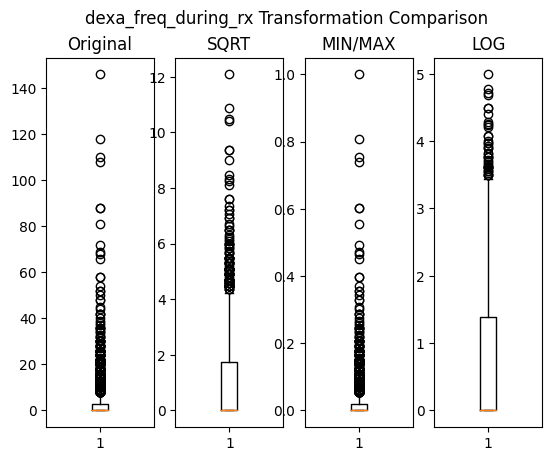

                    skew  kurtosis
count_of_risks  0.873333   0.88179
                         skew  kurtosis
sqrt_count_of_risks -0.331715 -1.035523
                            skew  kurtosis
min_max_count_of_risks  0.873333   0.88179
                        skew  kurtosis
log_count_of_risks -0.095692 -1.006652


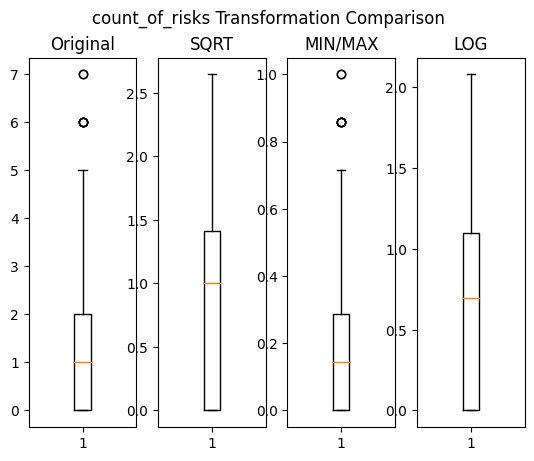

In [120]:
def quantitative_analysis(df, quantitative_cols):

    # take in each col
    for col in quantitative_cols:

        # create transformations (one column for each transformation)
        scaler = MinMaxScaler()
        data = np.array(df[[col]])
        scaler.fit(data)#computing min and max to be used for scaling

        df['sqrt_'+col] = np.sqrt(df[col])
        df['min_max_'+col] = scaler.transform(data) 
        df['log_'+col] = np.log1p(df[col])

        # compare skewness
        # print(f"Original Skew: {df[[col]].agg(['skew', 'kurtosis']).transpose()}")
        # print(f"SQRT Skew: {    df[['sqrt_'+col]].agg(['skew', 'kurtosis']).transpose()}")
        # print(f"MIN/MAX Skew: { df[['min_max_'+col]].agg(['skew', 'kurtosis']).transpose()}")
        # print(f"LOG Skew: {     df[['log_'+col]].agg(['skew', 'kurtosis']).transpose()}")
        print(df[[col]].agg(['skew', 'kurtosis']).transpose())
        print(df[['sqrt_'+col]].agg(['skew', 'kurtosis']).transpose())
        print(df[['min_max_'+col]].agg(['skew', 'kurtosis']).transpose())
        print(df[['log_'+col]].agg(['skew', 'kurtosis']).transpose())

        # plot original + transformations
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
        fig.suptitle(col + ' Transformation Comparison')
        
        ax1.boxplot(df[col])
        ax2.boxplot(df['sqrt_'+col])
        ax3.boxplot(df['min_max_'+col])
        ax4.boxplot(df['log_'+col])

        ax1.set_title('Original')
        ax2.set_title('SQRT')
        ax3.set_title('MIN/MAX')
        ax4.set_title('LOG')

        # Display the plot
        plt.show()

        # calculate skewness for original + transformtions

quantitative_analysis(df, numeric_cols)

### Mutual Information

In [121]:
X = df.drop('persistency_flag', axis=1)
y = df.persistency_flag

# selector = SelectKBest(k=25)
# # first select features
# X_selected = selector.fit_transform(X,y)
# then split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [122]:
from sklearn.feature_selection import mutual_info_classif

#mutual information selecting all features
mutual = SelectKBest(score_func=mutual_info_classif, k='all')
#learn relationship from training data
mutual.fit(X_train, y_train)
# transform train input data
X_train_mut = mutual.transform(X_train)
# transform test input data
X_test_mut = mutual.transform(X_test)
#printing scores of the features
#for i in range(len(mutual.scores_)):
    #print('Feature %d: %f' % (i, mutual.scores_[i]))

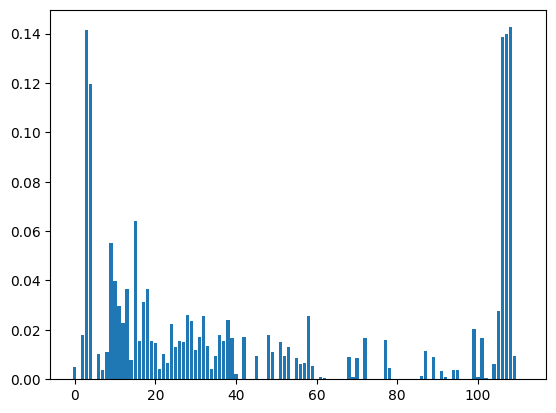

In [123]:
#plot the scores
plt.bar([i for i in range(len(mutual.scores_))], mutual.scores_)
plt.show()

### Correlation Analysis

In [124]:
corr = df.corr(numeric_only=False)["persistency_flag"]
corr_rank = corr.abs().sort_values(ascending=False)
corr_rank

persistency_flag                                                      1.000000
log_dexa_freq_during_rx                                               0.505353
dexa_during_rx                                                        0.495773
sqrt_dexa_freq_during_rx                                              0.477558
comorb_long_term_current_drug_therapy                                 0.358023
min_max_dexa_freq_during_rx                                           0.330503
dexa_freq_during_rx                                                   0.330503
comorb_encounter_for_immunization                                     0.318606
comorb_encounter_for_screening_for_malignant_neoplasms                0.317499
comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx       0.287595
comorb_other_disorders_of_bone_density_and_structure                  0.252569
concom_systemic_corticosteroids_plain                                 0.244364
comorb_other_joint_disorder_not_elsewhere_classified

In [125]:
(df.groupby([ "dexa_during_rx", "persistency_flag",], dropna=False).size() / df.groupby(["dexa_during_rx"], dropna=False).size())


dexa_during_rx  persistency_flag
0               0                   0.769627
                1                   0.230373
1               0                   0.229621
                1                   0.770379
dtype: float64

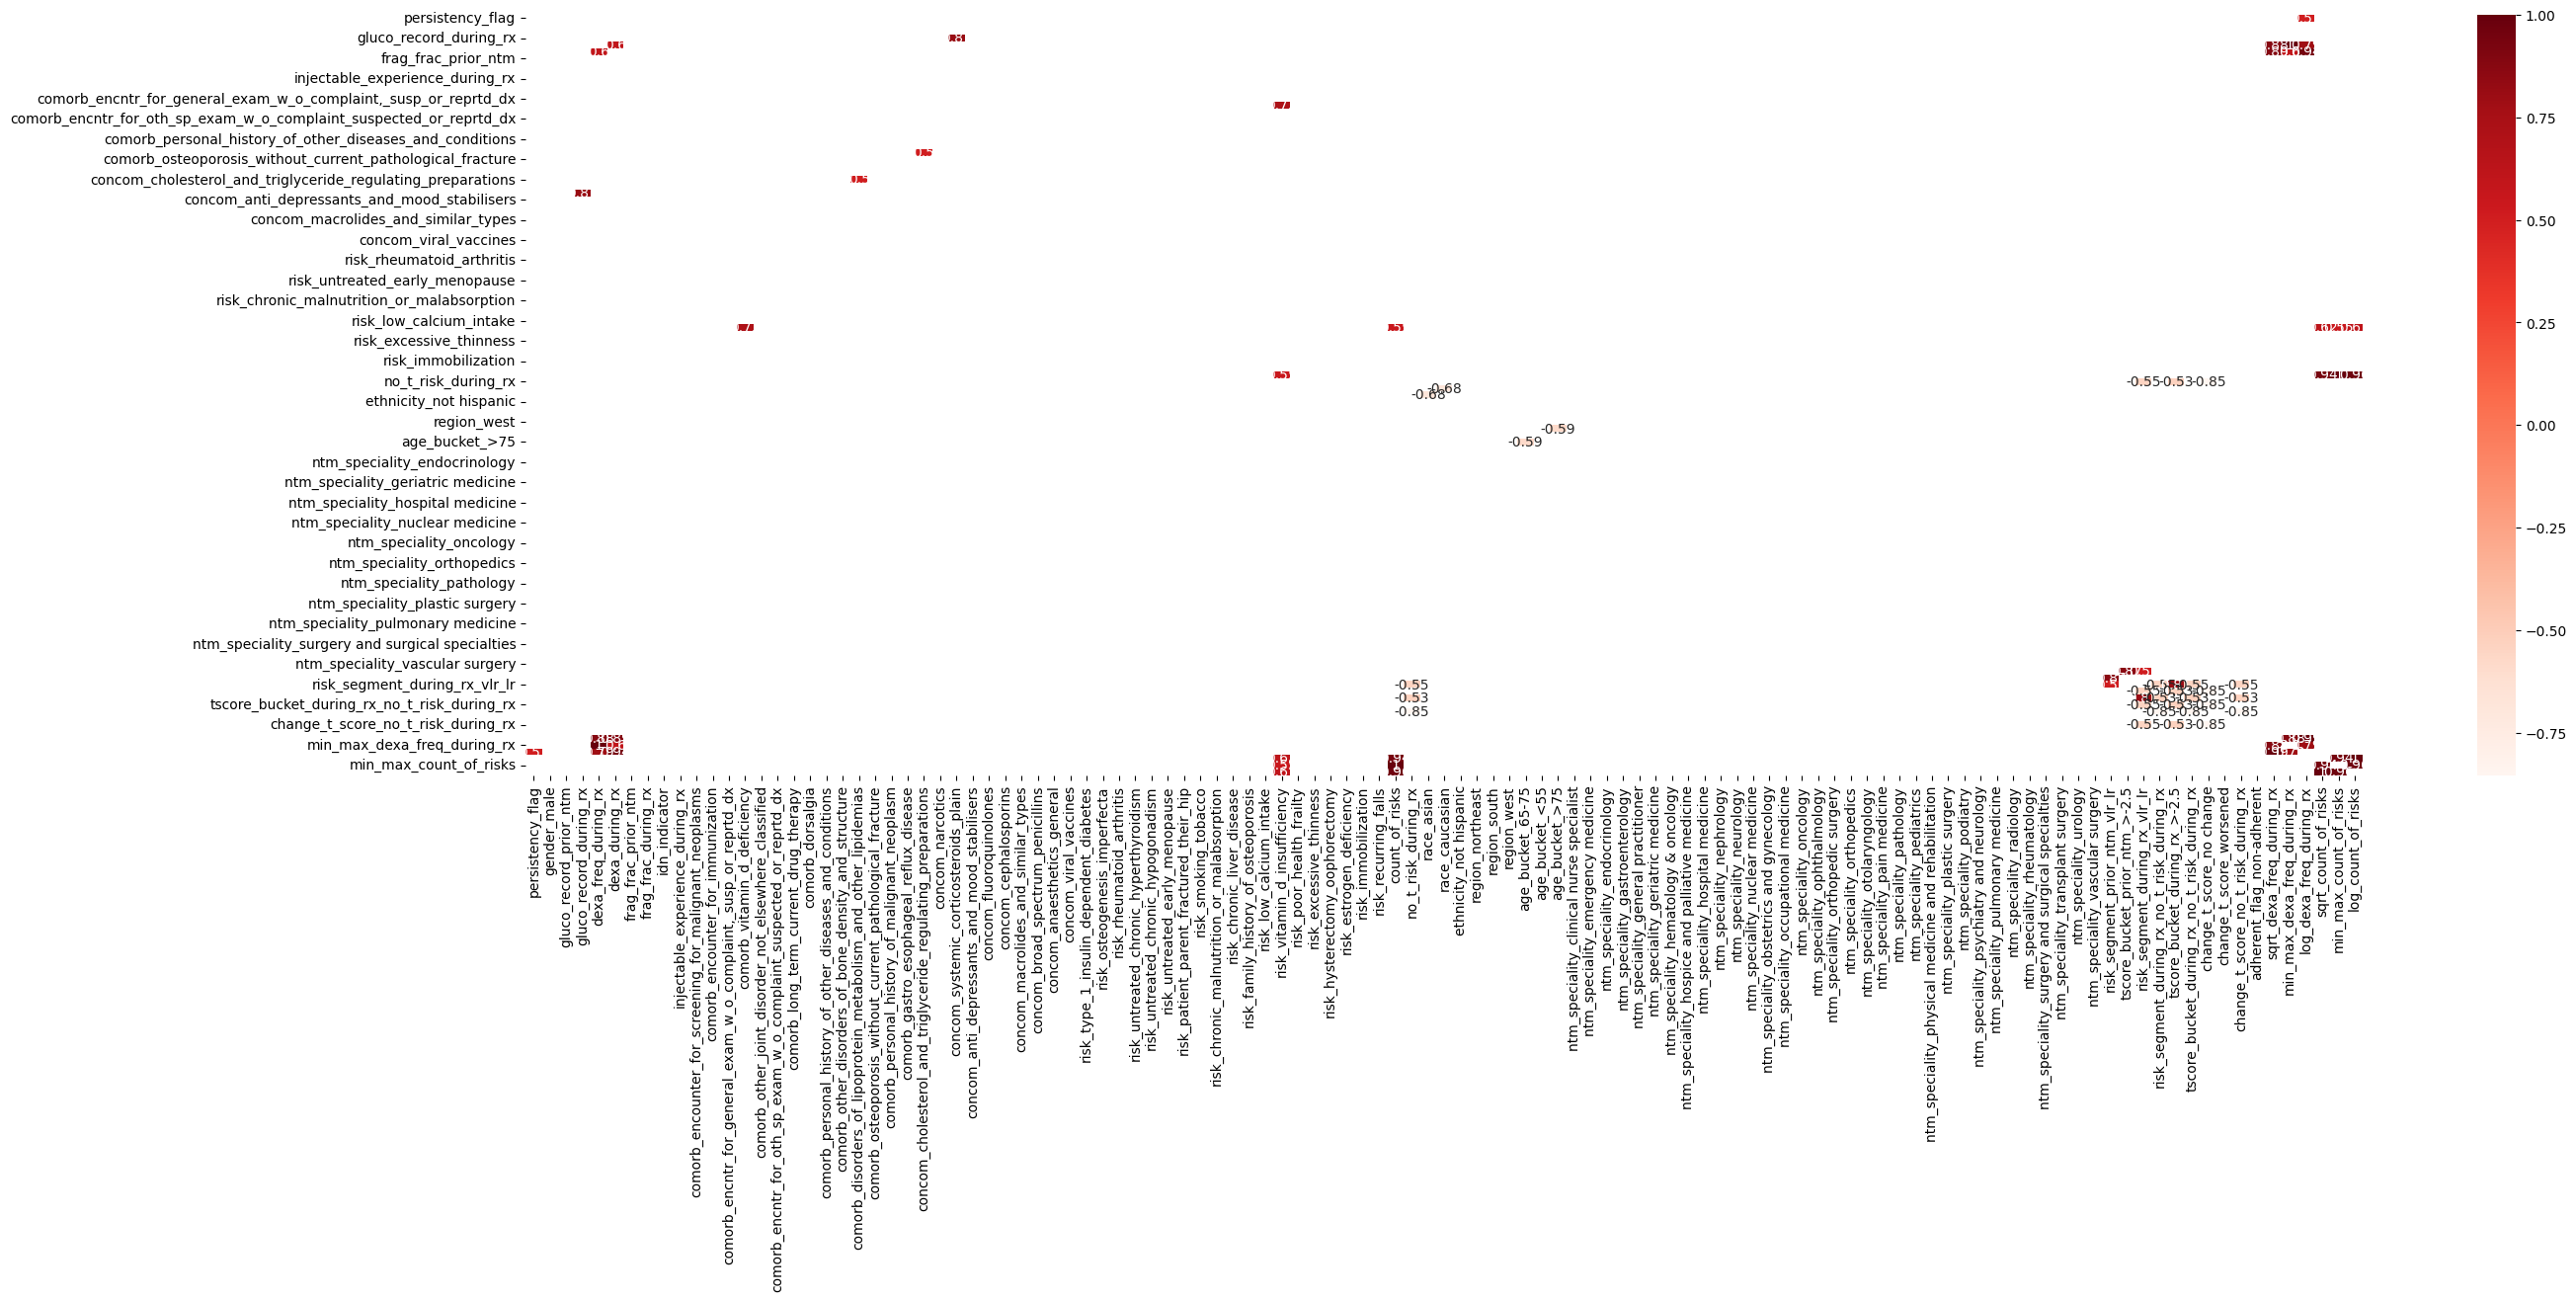

In [126]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]

plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [127]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df, .5)

change_t_score_no_t_risk_during_rx                           change_t_score_no change                                          -0.853191
race_asian                                                   race_caucasian                                                    -0.680355
age_bucket_65-75                                             age_bucket_>75                                                    -0.585282
risk_segment_during_rx_vlr_lr                                tscore_bucket_during_rx_no_t_risk_during_rx                       -0.549111
no_t_risk_during_rx                                          tscore_bucket_during_rx_>-2.5                                     -0.530910
concom_cholesterol_and_triglyceride_regulating_preparations  comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias    0.503266
log_dexa_freq_during_rx                                      persistency_flag                                                   0.505353
risk_segment_prior_ntm_vlr_lr            

### Quantitative Analysis

''

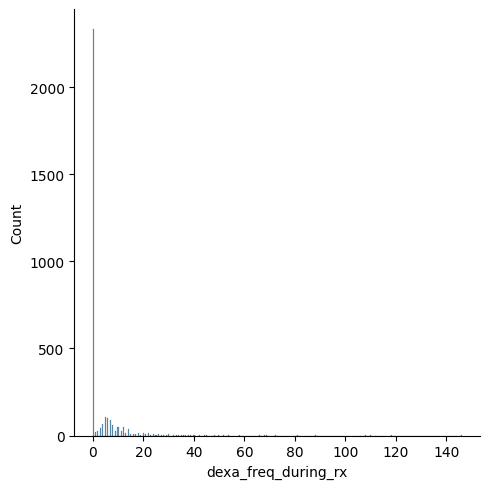

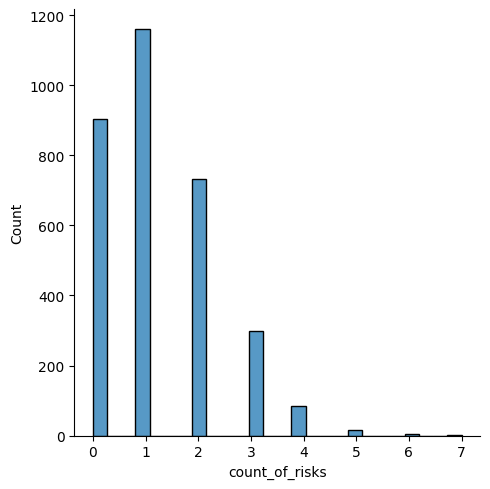

In [128]:
for col in numeric_cols:
    sns.displot(df[col])
;

In [129]:
# skewness along the index axis
df.skew(axis = 0).sort_values()

ethnicity_not hispanic                                                -6.862635
race_caucasian                                                        -3.988266
injectable_experience_during_rx                                       -2.606794
idn_indicator                                                         -1.221103
sqrt_count_of_risks                                                   -0.331715
tscore_bucket_prior_ntm_>-2.5                                         -0.287890
risk_segment_prior_ntm_vlr_lr                                         -0.259618
ntm_speciality_general practitioner                                   -0.159227
log_count_of_risks                                                    -0.095692
comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias       -0.062521
change_t_score_no change                                               0.056263
risk_vitamin_d_insufficiency                                           0.090077
comorb_encounter_for_screening_for_malig